<a href="https://colab.research.google.com/github/NinaNanaNina/MachineLearning/blob/MachineLearnign/Copy_of_Spam_Message_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam Message Classification

# 1) Data Preprocessing

In [3]:
# import relevant libraries
import numpy as np # work with array
import pandas as pd # read dataset
import matplotlib.pyplot as plt # display plot

In [4]:
# Red dataset from local, spe=\t means elements seprate by tab
df = pd.read_csv('spam.tsv', sep='\t')

In [5]:
# read just first 5 row of dataset (index 0 -4)
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
# display sum of missing data  True or 0 = there are no any missing data ==== False or 1 = there are some missing data
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
# If we want check the a few lasr row of dataset we use tail function
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [8]:
# This function just apply on numirical data
#in this dataset we have just 2 column that incloud numerical data length and punct so just dispaly descriptive analysis
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [9]:
# with this script we can see number of classification lable [ham and spam]
# there are 4825 ham and 747 spam
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [10]:
# if we want to know the percentage of division between labales
# 86% ham and 14% spam
df['label'].value_counts()/ (len(df))

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [11]:
# seeing that how many ham how many spam there are
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [12]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [13]:
ham = ham.sample(spam.shape[0])

In [14]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [47]:
# sice the number of lables are not the same, we want to  concatenate two Datafram together with "append" function
# in facet with appending rows of ham with rows of spam we create new data frame
data = ham.append(spam, ignore_index=True)

<ipython-input-47-eea4c508a771>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam, ignore_index=True)


In [48]:
# Number of combined rows together is 1494 with 4 feature
data.shape

(1494, 4)

In [49]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [18]:
data.head()

,label,message,length,punct
0,ham,Ok pa. Nothing problem:-),25,4
1,ham,Do ü noe if ben is going?,25,1
2,ham,But my family not responding for anything. Now...,154,3
3,ham,How? Izzit still raining?,25,2
4,ham,"Sorry,in meeting I'll call later",32,2


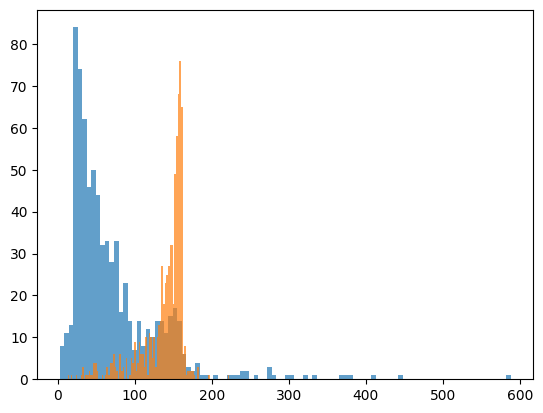

In [19]:
# create histogram for length of massage that sent
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()

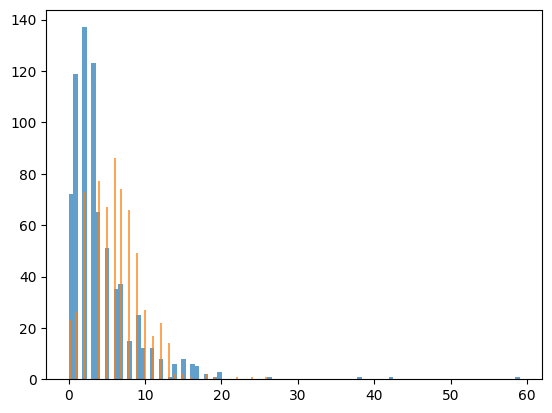

In [52]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

In [21]:
# from here we will work with new data
data

,label,message,length,punct
0,ham,Ok pa. Nothing problem:-),25,4
1,ham,Do ü noe if ben is going?,25,1
2,ham,But my family not responding for anything. Now...,154,3
3,ham,How? Izzit still raining?,25,2
4,ham,"Sorry,in meeting I'll call later",32,2
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [22]:
# before apply ML model we have to splite dataset to train and test modul
from sklearn.model_selection import train_test_split

In [53]:
# data set for testing 30%
X_train, X_test, y_train, y_test =  train_test_split(data['message'], data['label'], test_size = 0.3, random_state =0, shuffle = True)

In [55]:
# all data number * number of test = we can see how many numbert will be belong to testing here is 448.2
1494 * 0.3

448.2

In [57]:
X_train.shape

(1045,)

In [56]:
X_test.shape

(449,)

# 2) Building the Model (Random Forest)

In [59]:
#before working with ML models we should covert form text to vector (number)
from sklearn.feature_extraction.text import TfidfVectorizer
#ML classification model
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [60]:
# in calss piple line we use tfidf for spilit and classifier for ml model
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

In [61]:
#classifier training data X_train represents the features (input data) of training set, y_train represent the corresponding labels or target values
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

# 3) Predicting the results (Random Forest)

In [62]:
y_pred = classifier.predict(X_test)

In [31]:
y_test, y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam'

In [32]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [33]:
accuracy_score(y_test, y_pred)

0.9487750556792873

In [34]:
0.9465478841870824 * 449

425.0

In [35]:
confusion_matrix(y_test, y_pred)

array([[224,   3],
       [ 20, 202]])

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.99      0.95       227
        spam       0.99      0.91      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



# 4) Building the Model (SVM)

In [37]:
from sklearn.svm import SVC

In [38]:
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100, gamma='auto'))])

In [39]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

# 5) Predicting the results (SVM)

In [40]:
y_pred = svm.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred)

0.9398663697104677

In [42]:
confusion_matrix(y_test, y_pred)

array([[221,   6],
       [ 21, 201]])

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.97      0.94       227
        spam       0.97      0.91      0.94       222

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [44]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [45]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [46]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
